In [53]:
import glob
import matplotlib.pyplot as plt
import pandas as pd 
%matplotlib inline

In [54]:
dfs = []
for df_path in glob.glob('df*.csv'):
    dfs.append(pd.read_csv(df_path, index_col=0))

In [14]:
def averaged_budget_analysis(dfs):
    agents = dfs[0].columns[1:]

    ax = plt.figure()
    import numpy as np
    for agent in agents:
        agent = str(agent)
        means =  [np.mean(k) for k in zip(*[df[agent] for df in dfs])]
        errors = [np.std(k, ddof=1) / np.sqrt(np.size(k)) for k in zip(*[df[agent] for df in dfs])]
        # plt.plot(dfs[0]['budget'], means, '--o', yerr=errors, label=agent)
        eplt = plt.errorbar(dfs[0]['budget'], means, errors)
        eplt[0].set_label(agent)

    ax.fill_between(dfs[0]['budget'], means+errors, means-errors, where= means+errors > means-errors, facecolor='red', alpha=0.5, interpolate=True)

    plt.title('TSP Distance Minimization')
    plt.xlabel('Simulation Budget')
    plt.ylabel('Optimality Gap')
    plt.legend()
    plt.show()
    plt.savefig('budget_comparison.png')

AttributeError: 'Figure' object has no attribute 'fill_between'

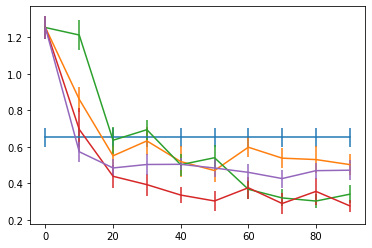

In [15]:
averaged_budget_analysis(dfs)

In [ ]:


with sns.axes_style("darkgrid"):
    epochs = list(range(101))
    for i in range(5):
        meanst = np.array(means.ix[i].values[3:-1], dtype=np.float64)
        sdt = np.array(stds.ix[i].values[3:-1], dtype=np.float64)
        ax.plot(epochs, meanst, label=means.ix[i]["label"], c=clrs[i])
        ax.fill_between(epochs, meanst-sdt, meanst+sdt ,alpha=0.3, facecolor=clrs[i])
    ax.legend()
    ax.set_yscale('log')

In [51]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def averaged_budget_analysis(dfs):
    agents = dfs[0].columns[1:]

    fig, ax = plt.subplots()
    clrs = sns.color_palette("Set2", 5)    
    styles = ['o', '^', '<', 's', 'D', 'h']
    with sns.axes_style("darkgrid"):
        for i, agent in enumerate(agents):
            agent = str(agent)
            means =  np.array([np.mean(k) for k in zip(*[df[agent] for df in dfs])])
            errors = np.array([np.std(k, ddof=1) / np.sqrt(np.size(k)) for k in zip(*[df[agent] for df in dfs])])
            ax.plot(dfs[0]['budget'], means, '-o', label=agent, c=clrs[i], marker=styles[i])
            ax.fill_between(dfs[0]['budget'], means-errors, means+errors ,alpha=0.3, facecolor=clrs[i])
            # plt.plot(dfs[0]['budget'], means, '--o', yerr=errors, label=agent)
    #         eplt = plt.errorbar(dfs[0]['budget'], means, errors)
    #         eplt[0].set_label(agent)

#     ax.fill_between(dfs[0]['budget'], means+errors, means-errors, where= means+errors > means-errors, facecolor='red', alpha=0.5, interpolate=True)
    plt.ylim([0.0, 1.4])
    plt.title('TSP Distance Minimization')
    plt.xlabel('Simulation Budget')
    plt.ylabel('Optimality Gap')
    plt.legend()
    plt.show()
    plt.savefig('budget_comparison.png')

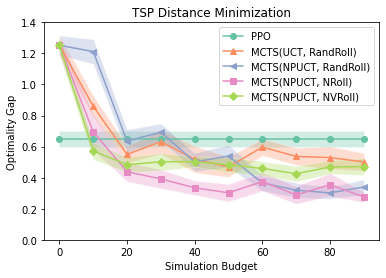

<Figure size 432x288 with 0 Axes>

In [52]:
averaged_budget_analysis(dfs) # calculation of tour distance was missing the last link in the ppo training reward

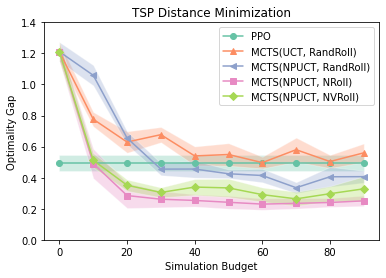

<Figure size 432x288 with 0 Axes>

In [55]:
averaged_budget_analysis(dfs)

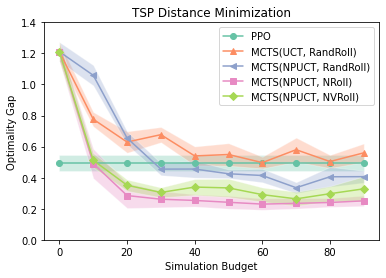

<Figure size 432x288 with 0 Axes>

In [56]:
averaged_budget_analysis(dfs)